In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mate_pi = pd.read_csv("Mate_PI_2020_2024.csv", index_col=0, dtype={"Condicion":"category", "Tipo_Cursada":"category"})

In [3]:
mate_pi.head()

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada,Virtual,Oral,Grupo
0,NaN,NaN,NaN,NaN,NaN,NaN,Desaprobado,NaN,2020,Verano,No,NaN,NaN
1,NaN,7.0,8.2,NaN,NaN,NaN,Promocionado,8.0,2020,Verano,No,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Desaprobado,NaN,2020,Verano,No,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Desaprobado,NaN,2020,Verano,No,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,Libre,NaN,2020,Verano,No,NaN,NaN


In [4]:
mate_pi.dtypes

1P1F             float64
1P2F             float64
2P1F             float64
2P2F             float64
F1               float64
F2               float64
Condicion       category
Final            float64
Año                int64
Tipo_Cursada    category
Virtual           object
Oral              object
Grupo             object
dtype: object

In [5]:
mate_pi["Condicion"].info()

<class 'pandas.core.series.Series'>
Index: 1144 entries, 0 to 1143
Series name: Condicion
Non-Null Count  Dtype   
--------------  -----   
1144 non-null   category
dtypes: category(1)
memory usage: 10.3 KB


In [6]:
mate_pi["Condicion"] = mate_pi["Condicion"].cat.set_categories(
                            ["Libre", "Abandonó", "Desaprobado", "Promocionado"],
                            ordered = True)

In [7]:
mate_pi["Tipo_Cursada"] = mate_pi["Tipo_Cursada"].cat.set_categories(
                            ["Verano", "1er Semestre", "Anticipada"],
                            ordered = True)

<Axes: xlabel='Condicion'>

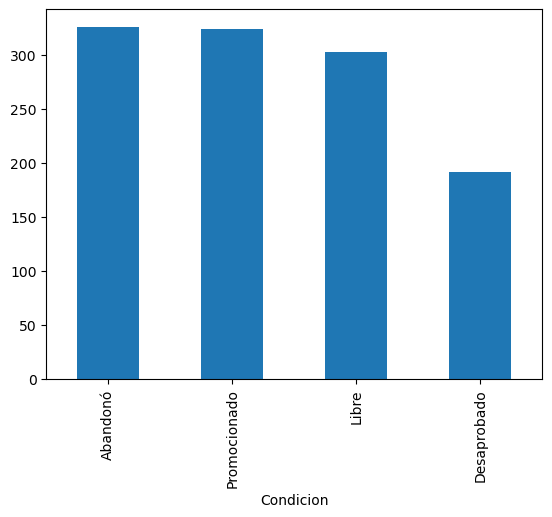

In [8]:
mate_pi["Condicion"].value_counts().plot.bar()

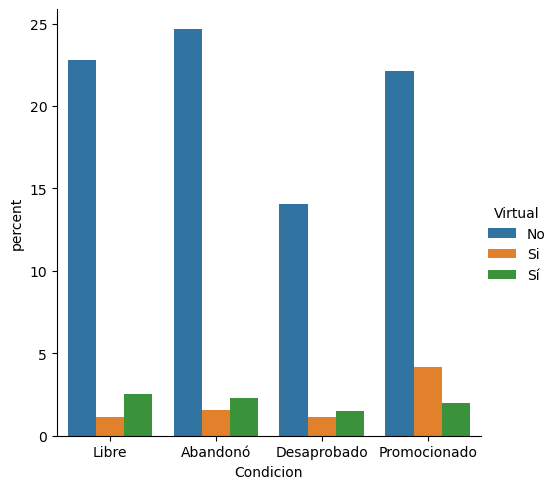

In [9]:
sns.catplot(data=mate_pi, x="Condicion", kind="count", stat="percent", hue="Virtual")

In [10]:
mate_pi["Virtual"].unique()

array(['No', 'Si', 'Sí'], dtype=object)

In [11]:
mate_pi["Virtual"] = mate_pi["Virtual"].str.replace("i", "í")

In [12]:
mate_pi["Virtual"].unique()

array(['No', 'Sí'], dtype=object)

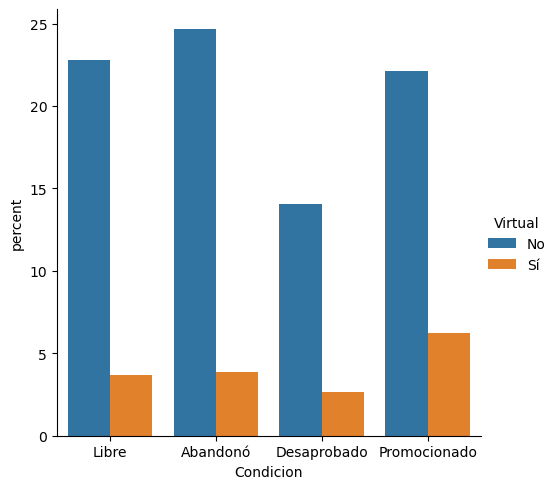

In [13]:
sns.catplot(data=mate_pi, x="Condicion", kind="count", stat="percent", hue="Virtual")

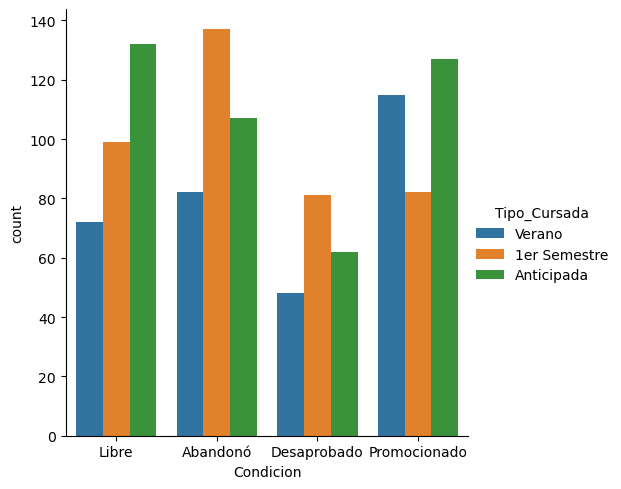

In [14]:
sns.catplot(data=mate_pi, x="Condicion", kind="count", hue="Tipo_Cursada")

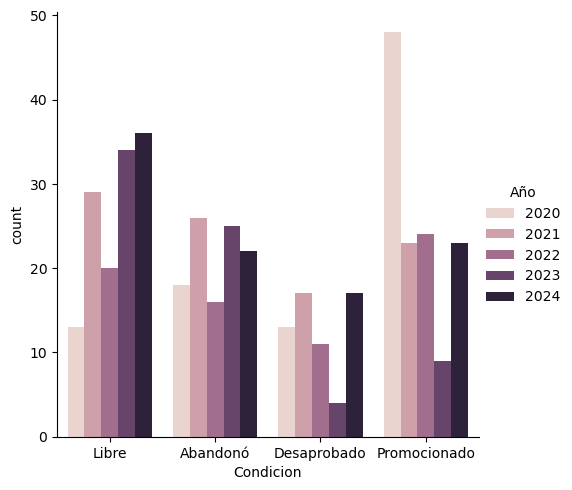

In [15]:
sns.catplot(data=mate_pi[mate_pi["Tipo_Cursada"] == "Anticipada"], x="Condicion", kind="count", hue="Año")

In [16]:
mate_pi.groupby("Virtual")["Condicion"].value_counts(normalize=True)

Virtual  Condicion   
No       Abandonó        0.294671
         Libre           0.272727
         Promocionado    0.264368
         Desaprobado     0.168234
Sí       Promocionado    0.379679
         Abandonó        0.235294
         Libre           0.224599
         Desaprobado     0.160428
Name: proportion, dtype: float64

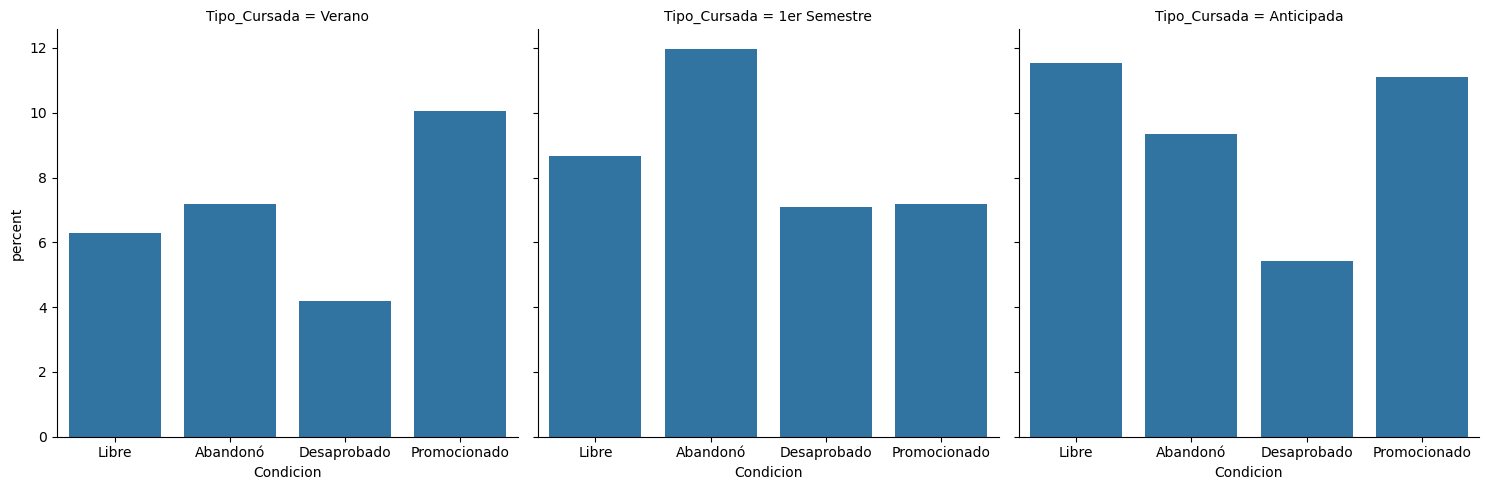

In [17]:
sns.catplot(data=mate_pi, x="Condicion", kind="count", col="Tipo_Cursada", stat="percent")

/tmp/ipykernel_29449/2455106890.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=mate_pi, x="Condicion", kind="count", col="Año", row="Tipo_Cursada", palette=["brown", "yellow", "red", "green"], stat="percent")


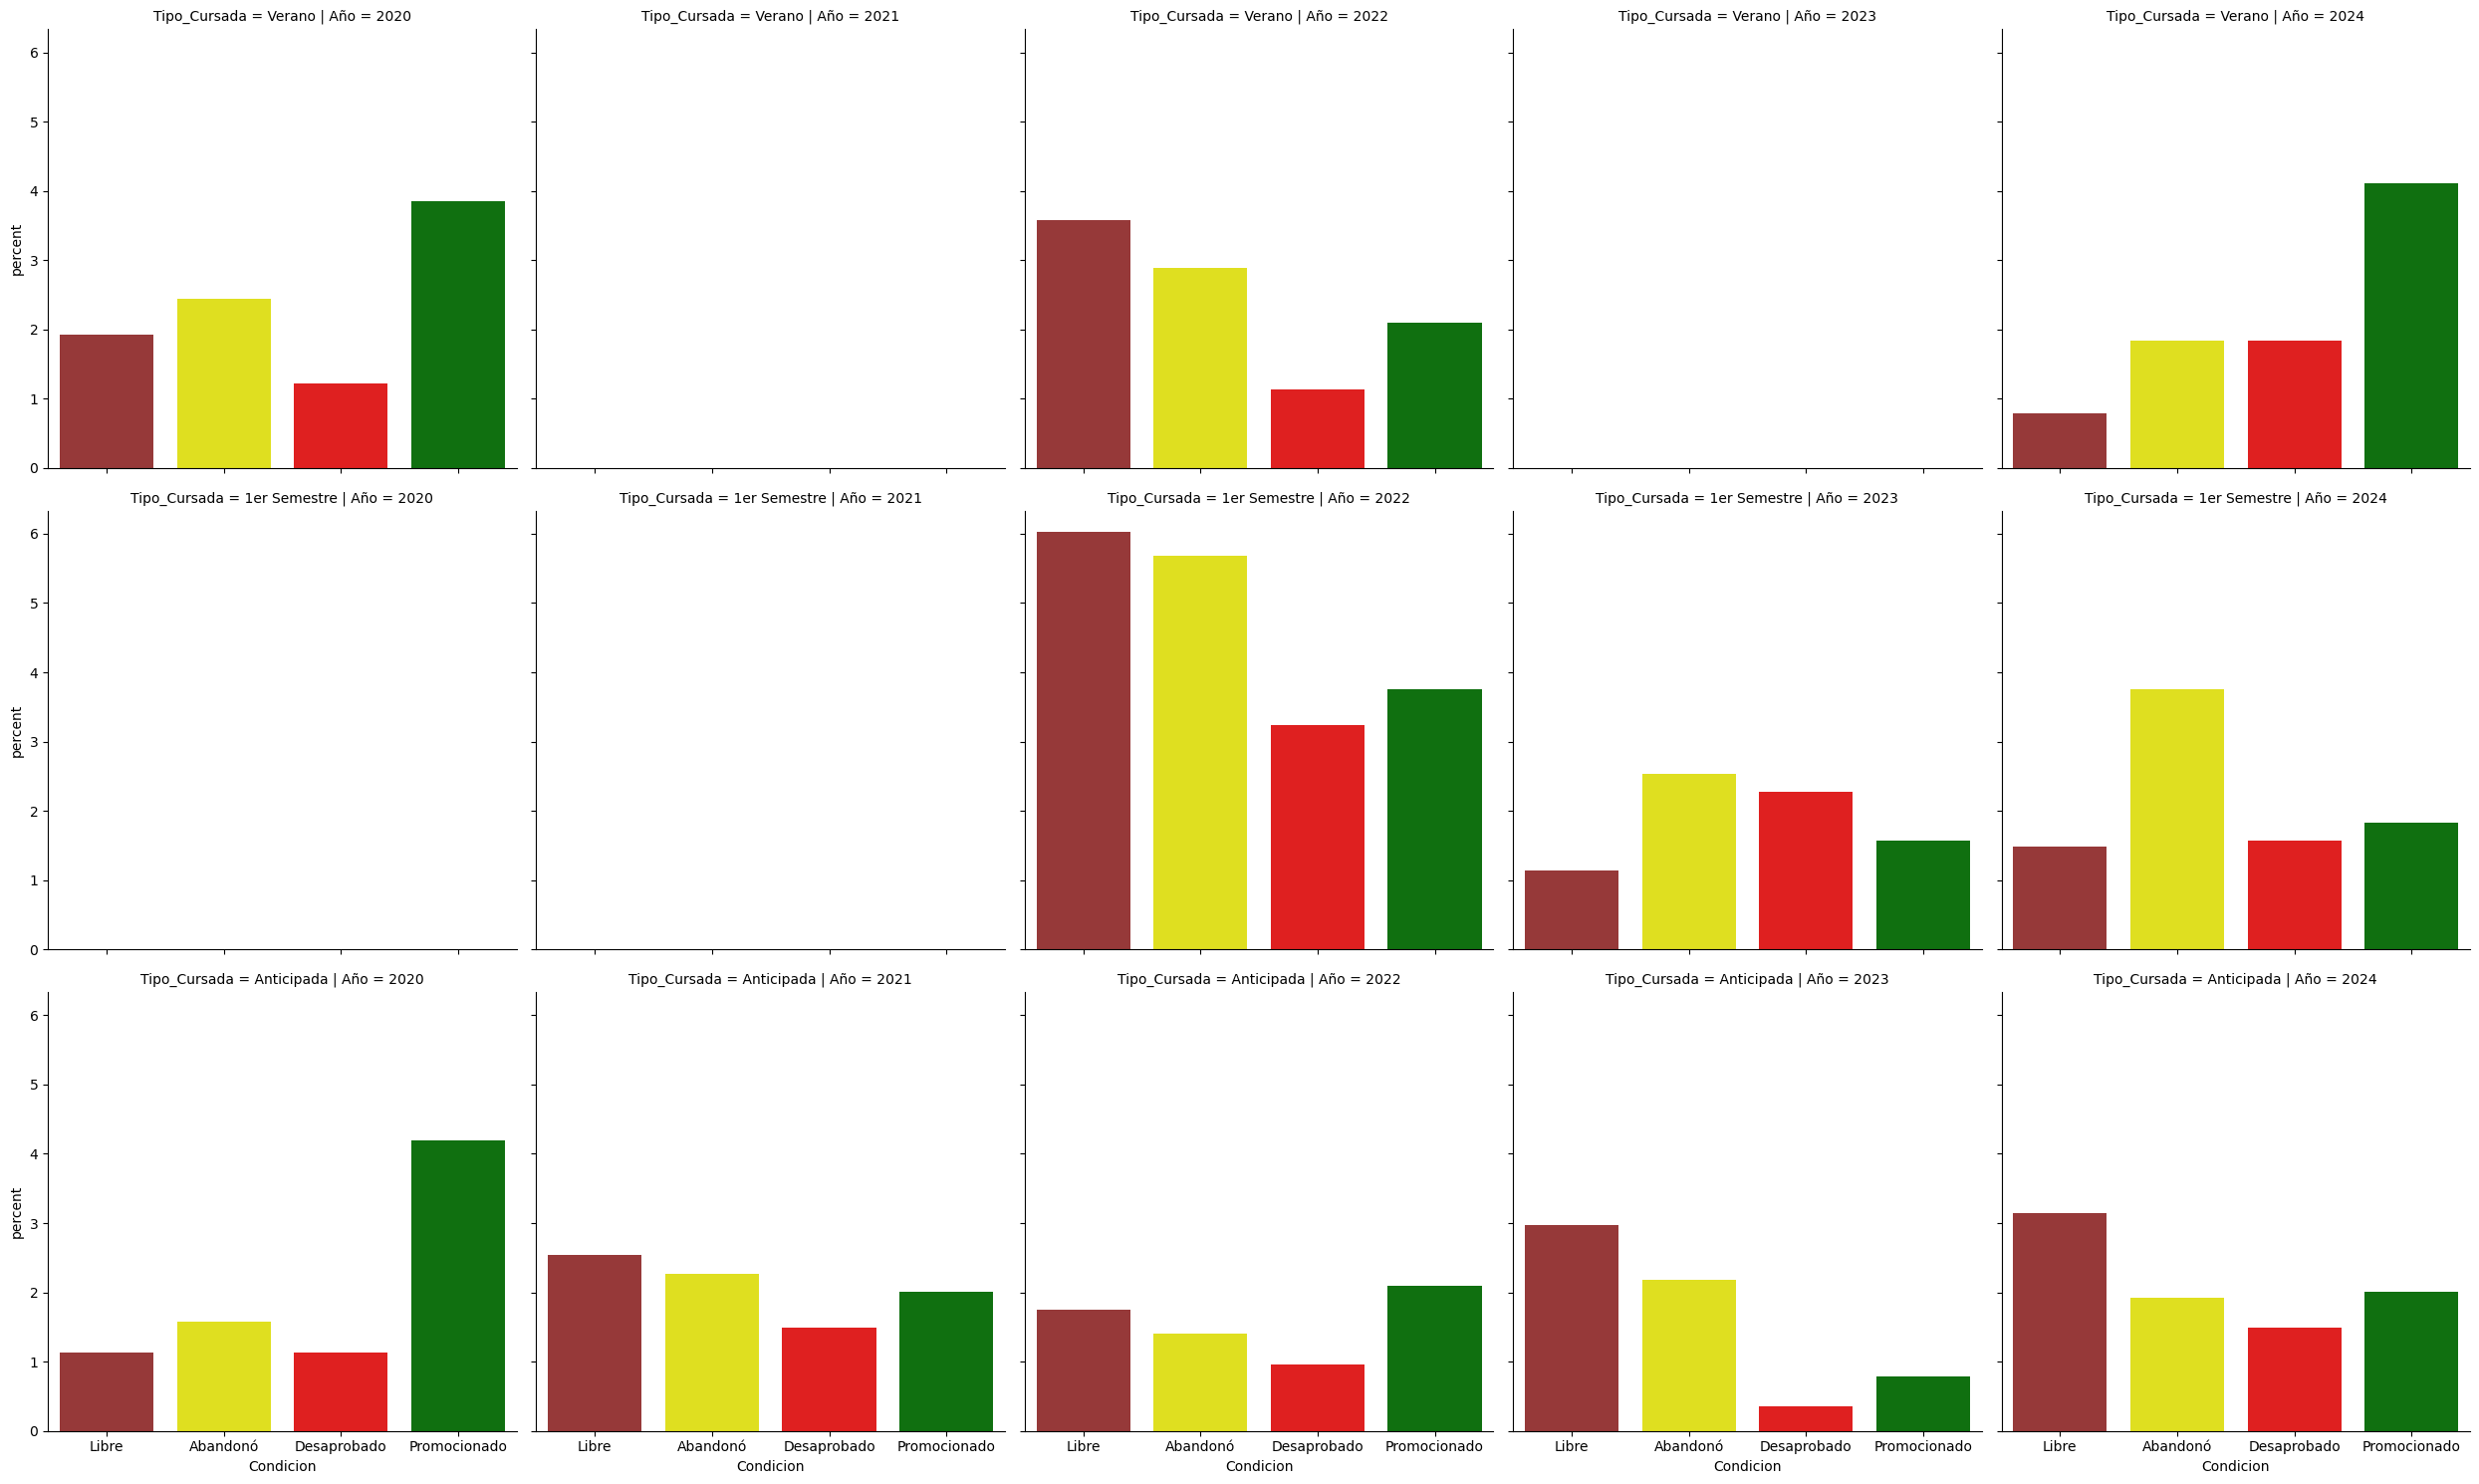

In [18]:
sns.catplot(data=mate_pi, x="Condicion", kind="count", col="Año", row="Tipo_Cursada", palette=["brown", "yellow", "red", "green"], stat="percent")

In [19]:
Verano_2020=mate_pi[ (mate_pi["Año"] == 2020) & (mate_pi["Tipo_Cursada"] == "Verano")]

/tmp/ipykernel_29449/2858966777.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=Verano_2020, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )


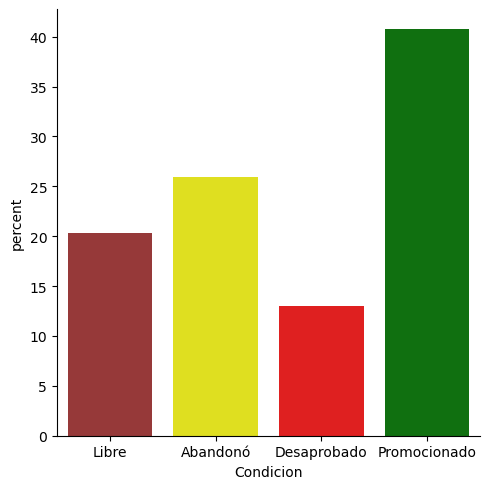

In [20]:
sns.catplot(data=Verano_2020, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )

In [21]:
Anticipada_2024=mate_pi[ (mate_pi["Año"] == 2024) & (mate_pi["Tipo_Cursada"] == "Anticipada")]

In [22]:
Anticipada_2024

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada,Virtual,Oral,Grupo
1046,4.4,8.0,6.0,NaN,NaN,NaN,Promocionado,7.0,2024,Anticipada,No,NaN,NaN
1047,0.0,0.4,0.0,NaN,NaN,NaN,Abandonó,NaN,2024,Anticipada,No,NaN,NaN
1048,4.5,6.1,5.9,NaN,NaN,NaN,Promocionado,6.0,2024,Anticipada,No,NaN,NaN
1049,NaN,8.2,9.5,NaN,NaN,NaN,Promocionado,9.0,2024,Anticipada,No,NaN,NaN
1050,9.5,NaN,NaN,6.3,NaN,NaN,Promocionado,8.0,2024,Anticipada,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,NaN,0.9,0.4,0.9,NaN,NaN,Desaprobado,NaN,2024,Anticipada,No,NaN,NaN
1140,NaN,NaN,NaN,NaN,NaN,NaN,Libre,NaN,2024,Anticipada,No,NaN,NaN
1141,7.0,NaN,8.5,NaN,NaN,NaN,Promocionado,8.0,2024,Anticipada,No,NaN,NaN
1142,0.2,NaN,NaN,NaN,NaN,NaN,Abandonó,NaN,2024,Anticipada,No,NaN,NaN


/tmp/ipykernel_29449/2415387664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=Anticipada_2024, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )


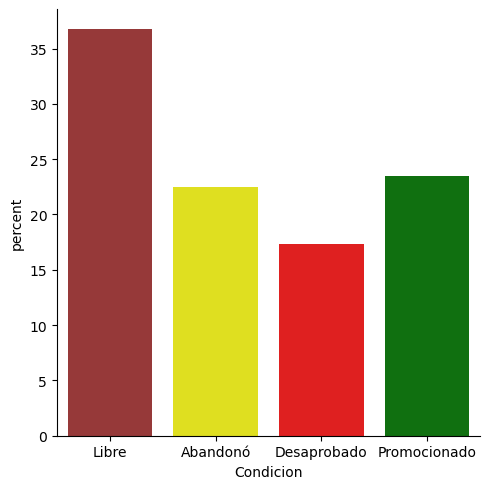

In [23]:
sns.catplot(data=Anticipada_2024, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )

In [28]:
Anticipada_2020=mate_pi[ (mate_pi["Año"] == 2020) & (mate_pi["Tipo_Cursada"] == "Anticipada")]

/tmp/ipykernel_29449/1523712708.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=Anticipada_2020, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )
/tmp/ipykernel_29449/1523712708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=Anticipada_2024, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )


[]

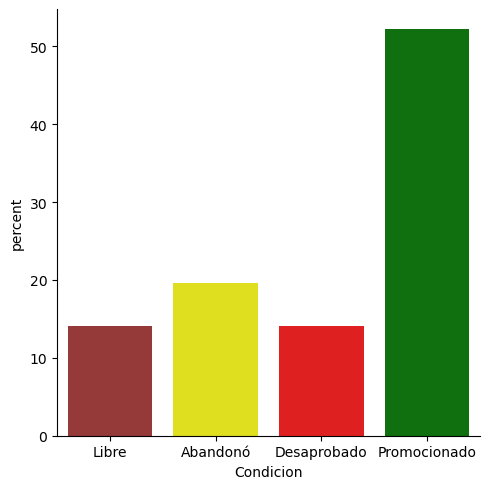

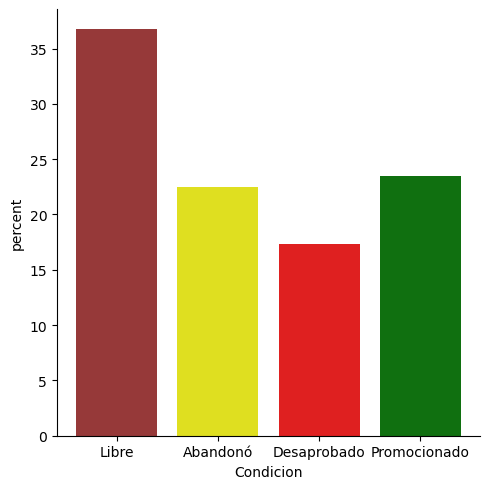

In [29]:
sns.catplot(data=Anticipada_2020, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )
sns.catplot(data=Anticipada_2024, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )
plt.plot()

In [30]:
# A function to filter data: Año, Tipo_Cursada
def filtered_data(data, año, tipo_cursada):
    """

    Parameters
    ----------
    data : pandas DataFrame
    año : integer
        Year to filter, from 2020 to 2024
    tipo_cursada : string
        Options: Verano, Intensiva, 1er Semestre
    Returns
    -------
    pandas DataFrame

    """
    return data[ (data["Año"] == año) & (data["Tipo_Cursada"] == tipo_cursada)]

/tmp/ipykernel_29449/2769064095.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.catplot(data=data, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"], hue="Condicion", legend=False )
/tmp/ipykernel_29449/2769064095.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.catplot(data=data, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"], hue="Condicion", legend=False )
/tmp/ipykernel_29449/2769064095.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.catplot(data=data, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"], hue="Condicion", legend=False )
/tmp/ipykernel_29449/2769064095.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.catplot(data=data, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "

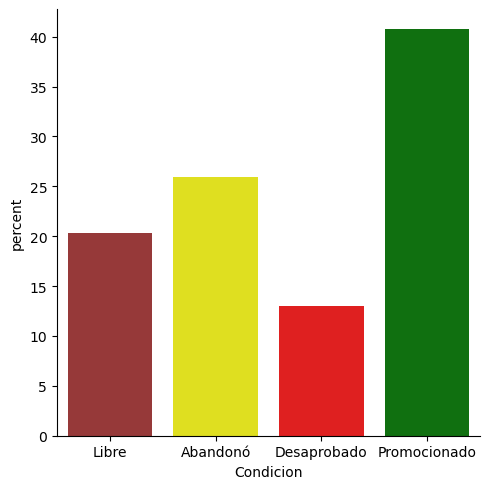

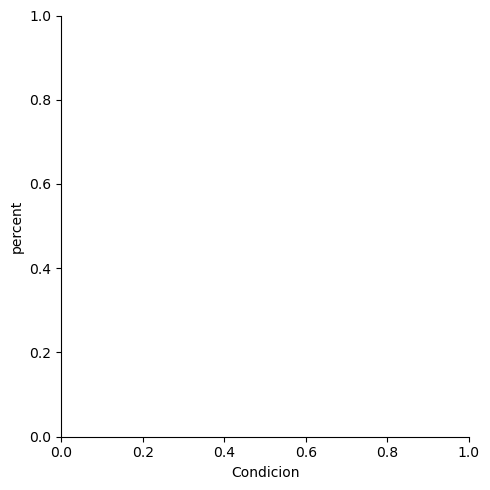

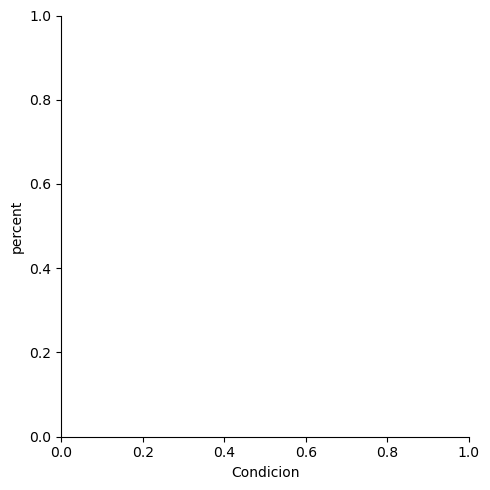

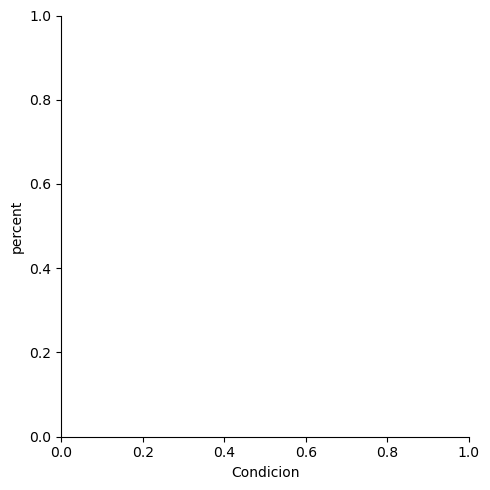

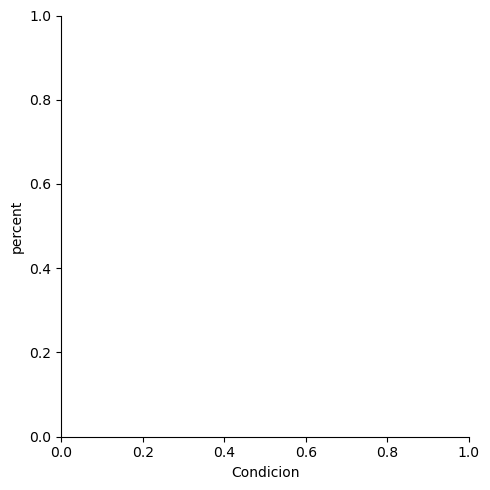

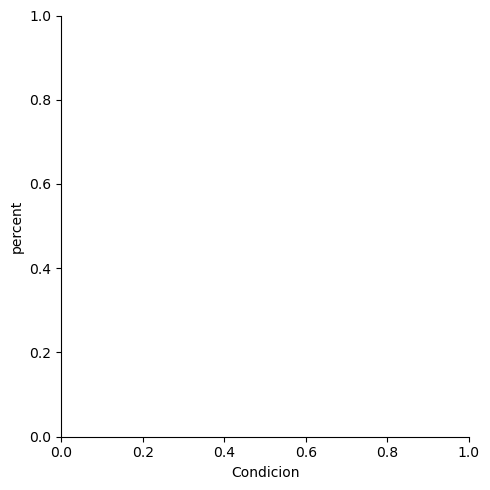

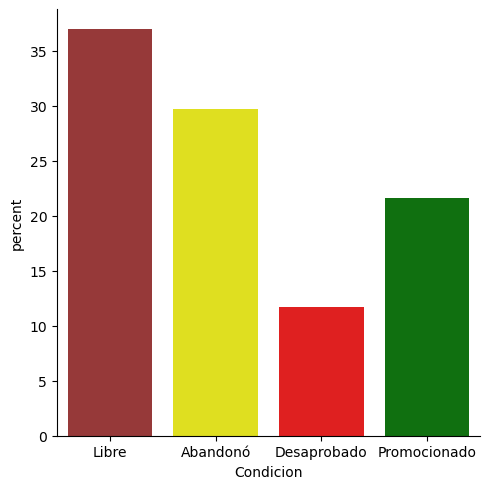

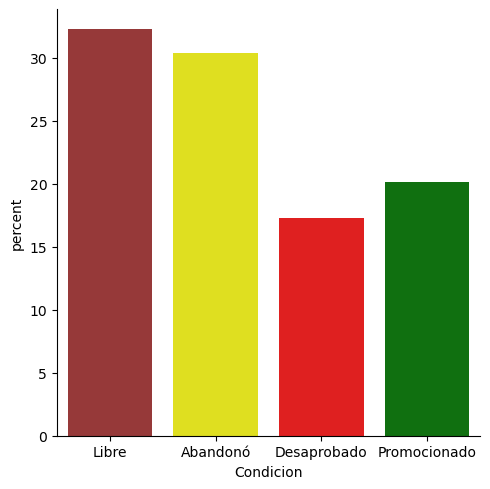

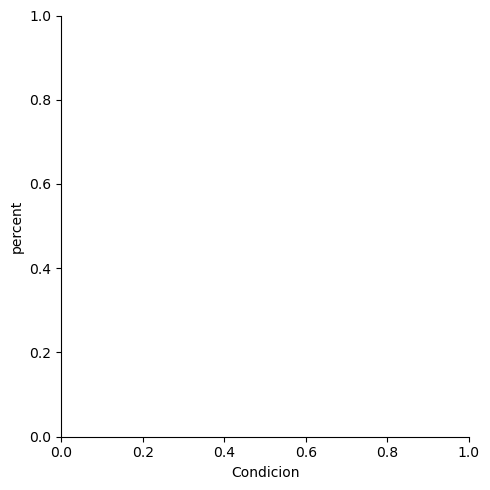

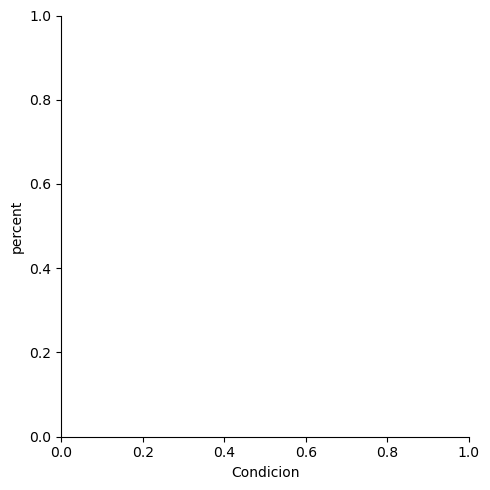

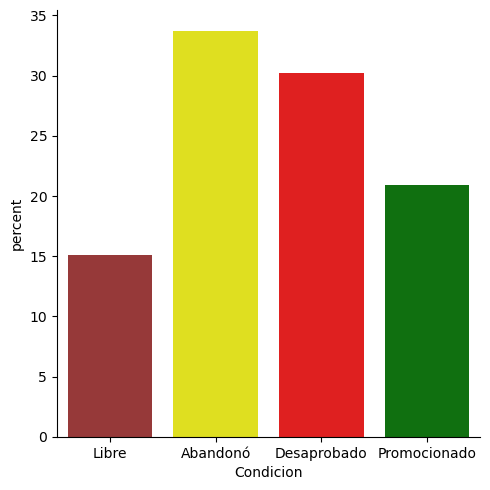

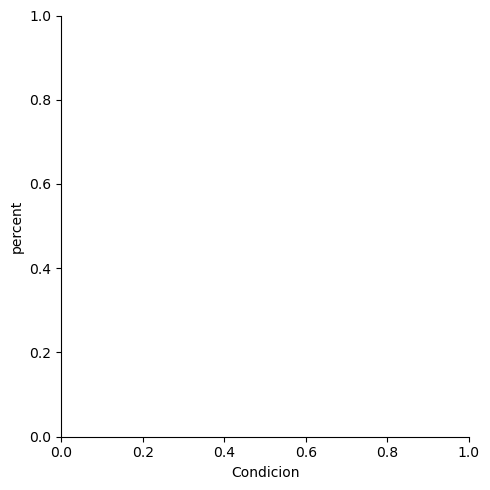

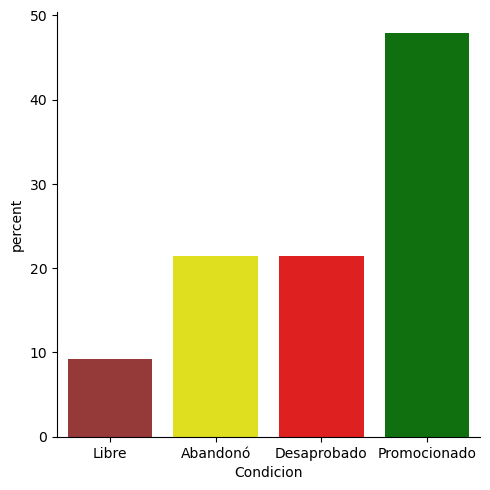

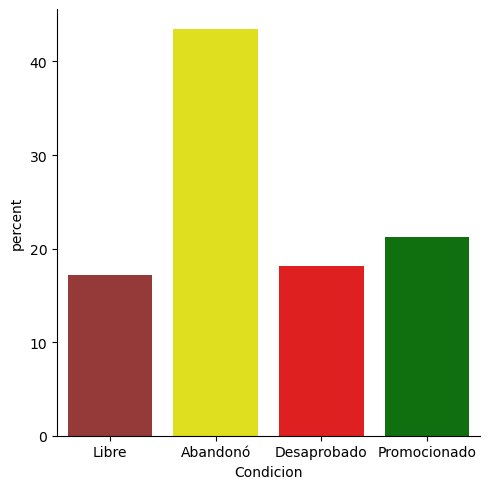

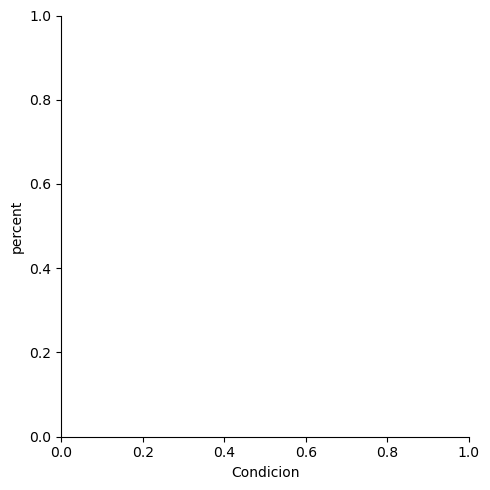

In [38]:
for año in range(2020, 2025, 1):
    for cursada in ["Verano", "1er Semestre", "Intensiva"]:
        data = filtered_data(mate_pi, año, cursada)
        sns.catplot(data=data, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"], hue="Condicion", legend=False )

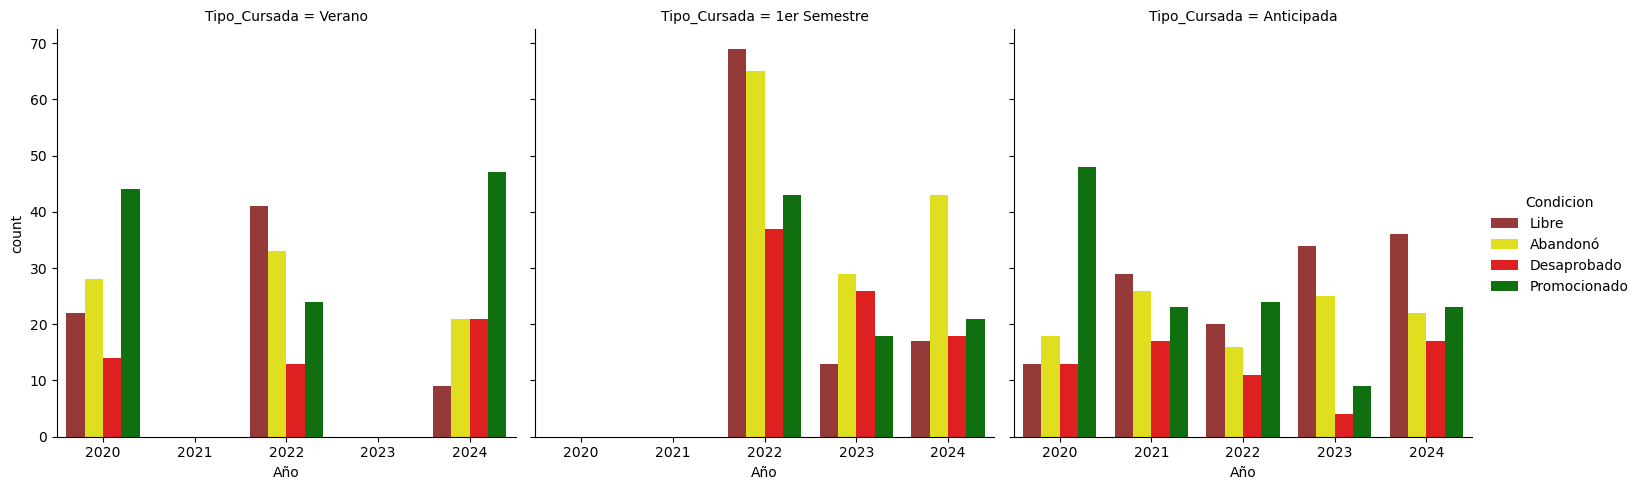

In [41]:
sns.catplot(data=mate_pi, x="Año", kind="count", hue="Condicion", col="Tipo_Cursada", palette=["brown", "yellow", "red", "green"])

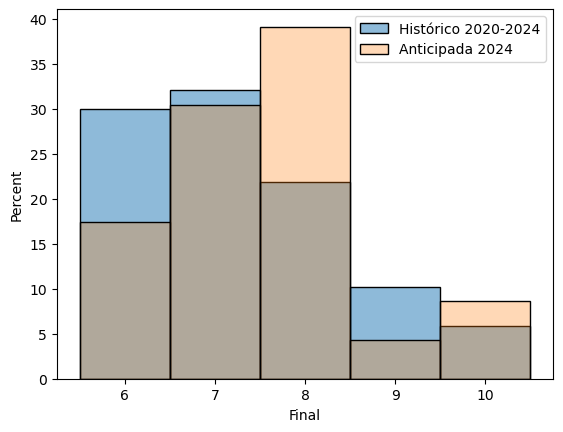

In [83]:
sns.histplot(data=mate_pi, x="Final", bins=5, stat="percent", alpha=0.5, discrete=True, label="Histórico 2020-2024")
sns.histplot(data=Anticipada_2024, x="Final", bins=5, stat="percent", alpha=0.3, discrete=True, label="Anticipada 2024")
plt.legend()

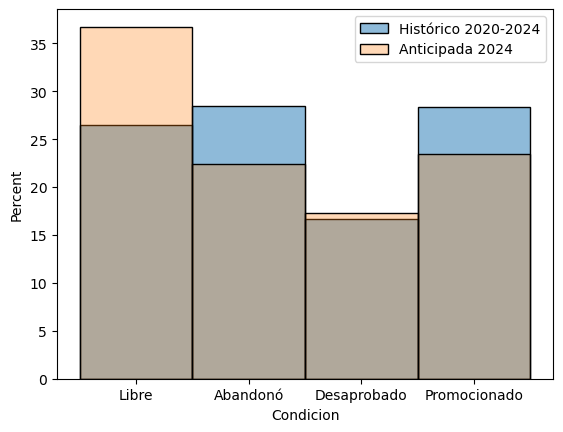

In [85]:
sns.histplot(data=mate_pi, x="Condicion", bins=5, stat="percent", alpha=0.5, discrete=True, label="Histórico 2020-2024")
sns.histplot(data=Anticipada_2024, x="Condicion", bins=5, stat="percent", alpha=0.3, discrete=True, label="Anticipada 2024")
plt.legend()

In [81]:
Anticipadas = mate_pi[ mate_pi["Tipo_Cursada"] == "Anticipada" ]

In [82]:
Anticipadas

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada,Virtual,Oral,Grupo
108,8.7,NaN,7.90,NaN,NaN,NaN,Promocionado,9.0,2020,Anticipada,Sí,Aprobado,NaN
109,6.6,NaN,NaN,NaN,NaN,NaN,Abandonó,NaN,2020,Anticipada,Sí,NaN,NaN
110,6.0,NaN,7.95,NaN,NaN,NaN,Promocionado,8.0,2020,Anticipada,Sí,Aprobado,NaN
111,5.9,NaN,5.20,4.4,NaN,8.3,Promocionado,8.0,2020,Anticipada,Sí,Aprobado,NaN
112,5.3,NaN,4.30,3.3,NaN,5.2,Desaprobado,NaN,2020,Anticipada,Sí,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,NaN,0.9,0.40,0.9,NaN,NaN,Desaprobado,NaN,2024,Anticipada,No,NaN,NaN
1140,NaN,NaN,NaN,NaN,NaN,NaN,Libre,NaN,2024,Anticipada,No,NaN,NaN
1141,7.0,NaN,8.50,NaN,NaN,NaN,Promocionado,8.0,2024,Anticipada,No,NaN,NaN
1142,0.2,NaN,NaN,NaN,NaN,NaN,Abandonó,NaN,2024,Anticipada,No,NaN,NaN


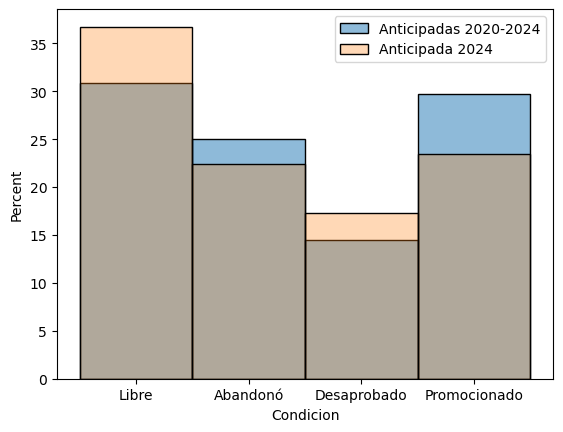

In [86]:
sns.histplot(data=Anticipadas, x="Condicion", bins=5, stat="percent", alpha=0.5, discrete=True, label="Anticipadas 2020-2024")
sns.histplot(data=Anticipada_2024, x="Condicion", bins=5, stat="percent", alpha=0.3, discrete=True, label="Anticipada 2024")
plt.legend()

<Axes: xlabel='1P1F', ylabel='Percent'>

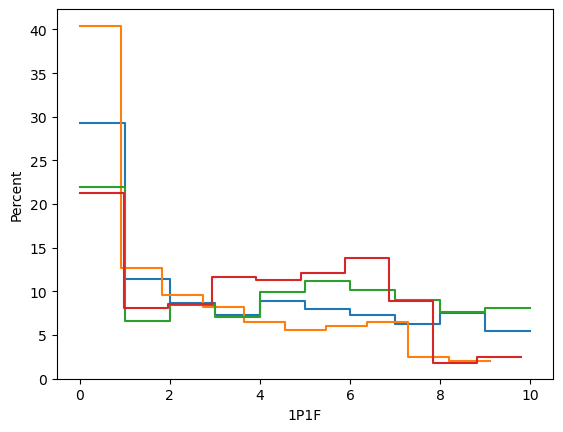

In [97]:
sns.histplot(data=mate_pi, x="1P1F", bins=10, stat="percent", fill=False, element="step")
sns.histplot(data=mate_pi, x="1P2F", bins=10, stat="percent", fill=False, element="step")
sns.histplot(data=mate_pi, x="2P1F", bins=10, stat="percent", fill=False, element="step")
sns.histplot(data=mate_pi, x="2P2F", bins=10, stat="percent", fill=False, element="step")

In [98]:
mate_pi.dtypes

1P1F             float64
1P2F             float64
2P1F             float64
2P2F             float64
F1               float64
F2               float64
Condicion       category
Final            float64
Año                int64
Tipo_Cursada    category
Virtual           object
Oral              object
Grupo             object
dtype: object

In [99]:
mate_pi.duplicated()

0       False
1       False
2        True
3        True
4       False
        ...  
1139    False
1140     True
1141    False
1142    False
1143     True
Length: 1144, dtype: bool